# Scraping top 100 Athletes in the world from World Athletics website.

![](https://i.imgur.com/LR7YZFI.png)

### In this project we are going to scrape the 100 Meters race with top 100 Womens in the world wide year wise and store the data in the form of csv.

## Web Scraping is the process of extracting and parsing data from websites in an automated fashion using computer program


![](https://i.imgur.com/CNpNBEJ.png)

## Outline of the project:

- understanding the structure of the [world Atheletes](https://www.worldathletics.org/).
- Installing and importing required libraries.
- Accessing the URL from `requests`library.
- Parsing the project`Title`,project`Link` using `HTML` parser.
- Creating the empty lists and dictionary to store the extracted data.
- Compiling all the data into a `DataFrame` using pandas and saving data into `CSV` file.


#### By the end of the project we will create the `DataFrame` in this following format.

![](https://i.imgur.com/VXyTyz0.png)

In [1]:
import requests

In [4]:
url = 'https://www.worldathletics.org/records/toplists/sprints/100-metres/outdoor/women/senior/2022'

To download the web page we are using the requests.get function

In [5]:
response = requests.get(url)

If the request was successful the value of the response code will be between 200 to 299

In [6]:
response.status_code

200

In [7]:
len(response.text)

858530

In [8]:
page_contents = response.text

The page contains over 8,58,530 characters! so that we will just view first 1000 characters from the webpage.

In [9]:
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n    <title>\n        100 Metres - women - senior - outdoor - 2022  \n    </title>\n\n    \n    <meta charset="utf-8" />\n    <meta name="Description" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1, user-scalable=yes">\n\n    \n\n    \n    <link rel="shortcut icon" href="/favicon.ico" />\n    \n    \n\n    \n    <meta name="application-name" content="" />\n    <meta name="msapplication-TileColor" content="#000000" />\n    <meta name="msapplication-square70x70logo" content="/Assets/Images/layout/other-touch/tiny.png" />\n    <meta name="msapplication-square150x150logo" content="/Assets/Images/layout/other-touch/square.png" />\n    <meta name="msapplication-wide310x150logo" content="/Assets/Images/layout/other-to

## Use Beautiful Soup to parse and extract information
To extract the information from the HTML source code of a page we can use BeautifulSoup library to import that we have to use import BeautifulSoup from the bs4 module.

In [ ]:
!pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup

Parsing the HTML webpage with beautifulsoup to read the the content present in that page

In [11]:
doc = BeautifulSoup(page_contents, 'html.parser')

In [12]:
type(doc)

bs4.BeautifulSoup

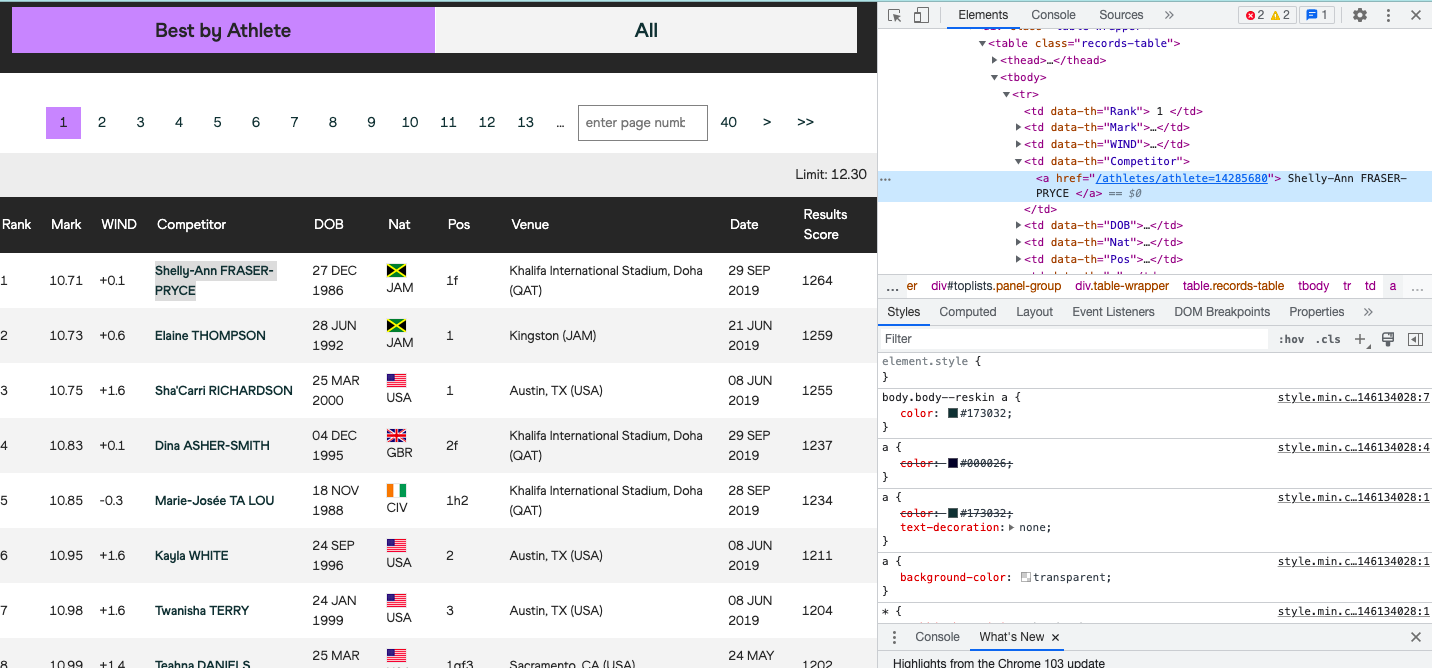


Checking the title of the and to remove the new lines we just use .strip functions to get rid of the unnecessary sapces 


In [62]:
doc.title.text

'\n        100 Metres - women - senior - outdoor - 2022  \n    '

In [13]:
doc.title.text.strip()

'100 Metres - women - senior - outdoor - 2022'

Fetching the rows with find_all function in the webpage to get the data present in it.

In [14]:
rows = doc.tbody.find_all('tr')

In [15]:
rows[:10]

[<tr>
 <td data-th="Rank">
 1                                        </td>
 <td data-th="Mark">
                                             10.67
                                         </td>
 <td data-th="WIND">
                                                 -0.4
                                             </td>
 <td data-th="Competitor">
 <a href="/athletes/athlete=14285680">
             Shelly-Ann FRASER-PRYCE
         </a>
 </td>
 <td data-th="DOB">
                                             27 DEC 1986
                                         </td>
 <td data-th="Nat">
 <img alt="JAM" class="tableflag" src="https://media.aws.iaaf.org/Flags/JAM.gif">
                                             JAM
                                         </img></td>
 <td data-th="Pos">
                                             1
                                         </td>
 <td data-th=" "></td>
 <td data-th="Venue">
                                             Moi International Sports

In [16]:
doc.tbody.find_all('td')

[<td data-th="Rank">
 1                                        </td>,
 <td data-th="Mark">
                                             10.67
                                         </td>,
 <td data-th="WIND">
                                                 -0.4
                                             </td>,
 <td data-th="Competitor">
 <a href="/athletes/athlete=14285680">
             Shelly-Ann FRASER-PRYCE
         </a>
 </td>,
 <td data-th="DOB">
                                             27 DEC 1986
                                         </td>,
 <td data-th="Nat">
 <img alt="JAM" class="tableflag" src="https://media.aws.iaaf.org/Flags/JAM.gif">
                                             JAM
                                         </img></td>,
 <td data-th="Pos">
                                             1
                                         </td>,
 <td data-th=" "></td>,
 <td data-th="Venue">
                                             Moi International Spor

In [17]:
rows[0].find_all('td')[8].text.strip()

'Moi International Sports Centre, Kasarani, Nairobi (KEN)'

In [18]:
rows[5].find_all('td')[1].text.strip()

'10.82'

In [19]:
rows[0].find_all('td')[3].text.strip()

'Shelly-Ann FRASER-PRYCE'

creating the list so that the entire data can be stored in the compitators list

In [20]:
compitators=[]
for row in rows:
    for i in row:
        compitators.append(i.text.strip())

In [21]:
compitators

['',
 '1',
 '',
 '10.67',
 '',
 '-0.4',
 '',
 'Shelly-Ann FRASER-PRYCE',
 '',
 '27 DEC 1986',
 '',
 'JAM',
 '',
 '1',
 '',
 '',
 '',
 'Moi International Sports Centre, Kasarani, Nairobi (KEN)',
 '',
 '07 MAY 2022',
 '',
 '1275',
 '',
 '',
 '2',
 '',
 '10.77',
 '',
 '+0.9',
 '',
 'Shericka JACKSON',
 '',
 '16 JUL 1994',
 '',
 'JAM',
 '',
 '1',
 '',
 '',
 '',
 'National Stadium, Kingston (JAM)',
 '',
 '24 JUN 2022',
 '',
 '1251',
 '',
 '',
 '3',
 '',
 '10.79',
 '',
 '+0.7',
 '',
 'Elaine THOMPSON-HERAH',
 '',
 '28 JUN 1992',
 '',
 'JAM',
 '',
 '1',
 '',
 '',
 '',
 'Hayward Field, Eugene, OR (USA)',
 '',
 '28 MAY 2022',
 '',
 '1246',
 '',
 '',
 '4',
 '',
 '10.81',
 '',
 '+1.7',
 '',
 'Julien ALFRED',
 '',
 '10 JUN 2001',
 '',
 'LCA',
 '',
 '1h2',
 '',
 '',
 '',
 'Terry & Linda Fuller T&F Complex, Lubbock, TX (USA)',
 '',
 '14 MAY 2022',
 '',
 '1242',
 '',
 '',
 '4',
 '',
 '10.81',
 '',
 '+0.5',
 '',
 'Aleia HOBBS',
 '',
 '24 FEB 1996',
 '',
 'USA',
 '',
 '1sf1',
 '',
 '',
 '',
 'Hayward F

As we were getting some unnecessary spaces in that list just removing the the empty string values from the list

In [22]:
for i in compitators:
    if(len(i)==0):
        compitators.remove(i)

In [23]:
compitators

['1',
 '10.67',
 '-0.4',
 'Shelly-Ann FRASER-PRYCE',
 '27 DEC 1986',
 'JAM',
 '1',
 'Moi International Sports Centre, Kasarani, Nairobi (KEN)',
 '07 MAY 2022',
 '1275',
 '2',
 '10.77',
 '+0.9',
 'Shericka JACKSON',
 '16 JUL 1994',
 'JAM',
 '1',
 'National Stadium, Kingston (JAM)',
 '24 JUN 2022',
 '1251',
 '3',
 '10.79',
 '+0.7',
 'Elaine THOMPSON-HERAH',
 '28 JUN 1992',
 'JAM',
 '1',
 'Hayward Field, Eugene, OR (USA)',
 '28 MAY 2022',
 '1246',
 '4',
 '10.81',
 '+1.7',
 'Julien ALFRED',
 '10 JUN 2001',
 'LCA',
 '1h2',
 'Terry & Linda Fuller T&F Complex, Lubbock, TX (USA)',
 '14 MAY 2022',
 '1242',
 '4',
 '10.81',
 '+0.5',
 'Aleia HOBBS',
 '24 FEB 1996',
 'USA',
 '1sf1',
 'Hayward Field, Eugene, OR (USA)',
 '24 JUN 2022',
 '1242',
 '6',
 '10.82',
 '+0.5',
 'Melissa JEFFERSON',
 '21 FEB 2001',
 'USA',
 '2sf1',
 'Hayward Field, Eugene, OR (USA)',
 '24 JUN 2022',
 '1239',
 '7',
 '10.85',
 '+1.3',
 "Sha'Carri RICHARDSON",
 '25 MAR 2000',
 'USA',
 '2',
 'Icahn Stadium, New York, NY (USA)',
 

Creating the empty lists of labels with dictionary to store the keys and thier values

In [24]:
rank = []
mark = []
wind = []
compitator = []
dob = []
nat = []
pos = []
venue = []
date = []
result_score = []
table = {
    'Rank':rank,
    'Mark':mark,
    'Wind':wind,
    'Compitator':compitator,
    'DOB':dob,
    'Nat':nat,
    'Pos':pos,
    'Venue':venue,
    'Date':date,
    'Results_Score':result_score
}

Applying for_loop for the dictionary and appending the values for each of the key inside the dictionary

In [25]:
for i in rows:
    rank.append(i.find_all('td')[0].text.strip())
    mark.append(i.find_all('td')[1].text.strip())
    wind.append(i.find_all('td')[2].text.strip())
    compitator.append(i.find_all('td')[3].text.strip())
    dob.append(i.find_all('td')[4].text.strip())
    nat.append(i.find_all('td')[5].text.strip())
    pos.append(i.find_all('td')[6].text.strip())
    venue.append(i.find_all('td')[8].text.strip())
    date.append(i.find_all('td')[9].text.strip())
    result_score.append(i.find_all('td')[10].text.strip())

#### Creating the DataFrame for the compitators of top 100 womens list in the year 2022 and saving the file in the form of CSV[comma seperated values]

In [7]:
import pandas as pd

In [27]:
df = pd.DataFrame(table)
df

,Rank,Mark,Wind,Compitator,DOB,Nat,Pos,Venue,Date,Results_Score
0,1,10.67,-0.4,Shelly-Ann FRASER-PRYCE,27 DEC 1986,JAM,1,"Moi International Sports Centre, Kasarani, Nai...",07 MAY 2022,1275
1,2,10.77,+0.9,Shericka JACKSON,16 JUL 1994,JAM,1,"National Stadium, Kingston (JAM)",24 JUN 2022,1251
2,3,10.79,+0.7,Elaine THOMPSON-HERAH,28 JUN 1992,JAM,1,"Hayward Field, Eugene, OR (USA)",28 MAY 2022,1246
3,4,10.81,+1.7,Julien ALFRED,10 JUN 2001,LCA,1h2,"Terry & Linda Fuller T&F Complex, Lubbock, TX ...",14 MAY 2022,1242
4,4,10.81,+0.5,Aleia HOBBS,24 FEB 1996,USA,1sf1,"Hayward Field, Eugene, OR (USA)",24 JUN 2022,1242
...,...,...,...,...,...,...,...,...,...,...
95,94,11.22,+2.0,Khamica BINGHAM,15 JUN 1994,CAN,4f1,"LSU Bernie Moore Stadium, Baton Rouge, LA (USA)",30 APR 2022,1152
96,94,11.22,+1.5,Iyana GRAY,,USA,2,"Cajuns Track and Soccer Facility, University o...",14 MAY 2022,1152
97,94,11.22,-0.4,Anna KIEŁBASIŃSKA,26 JUN 1990,POL,3,"Stadion Śląski, Chorzów (POL)",05 JUN 2022,1154
98,99,11.23,-0.1,Kamaya DUBOSE-EPPS,1999,USA,3f1,"Percy Beard Track, Gainesville, FL (USA)",16 APR 2022,1150


# To scrape the other website 
#### creating the function so that along with the url present just giving the input year and the page will be scraped and return the dataframe for us.


#### Creating Function to fetch webpage and parse with `BeautifulSoup`

In [22]:
def scrape_page(year):
    url = 'https://www.worldathletics.org/records/toplists/sprints/100-metres/outdoor/women/senior/' + str(year) + '?regionType=world&timing=electronic&windReading=regular&page=1&bestResultsOnly=true'
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(url))
    page_content = response.text
    doc = BeautifulSoup(page_content,'html.parser')
    return doc

#### Helper function which will return the dictionary

In [23]:
def make_dict():
    rank = []
    mark = []
    wind = []
    compitator = []
    dob = []
    nat = []
    pos = []
    venue = []
    date = []
    result_score = []
    table = {
    'Rank':rank,'Mark':mark,'Wind':wind,'Compitator':compitator,'DOB':dob,'Nat':nat,
        'Pos':pos,'Venue':venue,'Date':date,'Results_Score':result_score
    }
    return table

#### Helper function for getting data from rows and filling the required data into specific columns.

In [24]:
def get_rows(doc,table):
    rows = doc.tbody.find_all('tr')
    doc.tbody.find_all('td')
    table = table
    
    compitators=[]
    for row in rows:
        for i in row:
            compitators.append(i.text.strip())
    
    for i in compitators:
        if(len(i)==0):
            compitators.remove(i)
          
    for i in rows:
        table['Rank'].append(i.find_all('td')[0].text.strip())
        table['Mark'].append(i.find_all('td')[1].text.strip())
        table['Wind'].append(i.find_all('td')[2].text.strip())
        table['Compitator'].append(i.find_all('td')[3].text.strip())
        table['DOB'].append(i.find_all('td')[4].text.strip())
        table['Nat'].append(i.find_all('td')[5].text.strip())
        table['Pos'].append(i.find_all('td')[6].text.strip())
        table['Venue'].append(i.find_all('td')[8].text.strip())
        table['Date'].append(i.find_all('td')[9].text.strip())
        table['Results_Score'].append(i.find_all('td')[10].text.strip())        
    return table

#### Helper function to store the data into DataFrame

In [25]:
def make_df(table):
    return pd.DataFrame(table)

#### Function which takes URL and store the data into CSV file

In [26]:
def scrape_site(year):
    doc = scrape_page(year)
    table = make_dict()
    table = get_rows(doc,table)
    df = make_df(table)
    return df

#### Calling the function and just passing the year 2017 so that it is giving top 100 womens in the year 2017

In [27]:
table_2 = scrape_site(2018)
table_2

,Rank,Mark,Wind,Compitator,DOB,Nat,Pos,Venue,Date,Results_Score
0,1,10.85,+1.5,Marie-Josée TA LOU,18 NOV 1988,CIV,1,"Suhaim bin Hamad Stadium, Doha (QAT)",04 MAY 2018,1233
1,1,10.85,0.0,Dina ASHER-SMITH,04 DEC 1995,GBR,1,"Olympiastadion, Berlin (GER)",07 AUG 2018,1233
2,3,10.90,+1.5,Blessing OKAGBARE,09 OCT 1988,NGR,2,"Suhaim bin Hamad Stadium, Doha (QAT)",04 MAY 2018,1222
3,3,10.90,+1.9,Aleia HOBBS,24 FEB 1996,USA,1qf3,"Tampa, FL (USA)",25 MAY 2018,1222
4,3,10.90,+1.9,Murielle AHOURÉ,23 AUG 1987,CIV,2,"Hayward Field, Eugene, OR (USA)",26 MAY 2018,1222
...,...,...,...,...,...,...,...,...,...,...
95,92,11.25,+1.1,Salomé KORA,08 JUN 1994,SUI,3,Zofingen (SUI),13 JUL 2018,1146
96,97,11.26,-0.3,Natasha MORRISON,17 NOV 1992,JAM,3,"National Stadium, Kingston (JAM)",19 MAY 2018,1145
97,97,11.26,+1.9,Shauna HELPS,23 OCT 1996,JAM,5qf3,"Tampa, FL (USA)",25 MAY 2018,1144
98,97,11.26,+1.1,Laura MÜLLER,11 DEC 1995,GER,1h2,Weinheim (GER),06 JUL 2018,1144


Saving the Dataframe into csv files

In [29]:
df = pd.DataFrame(table_2)
df.to_csv('top_100_athletes_2018.csv')

In [30]:
df_1 = pd.read_csv('top_100_athletes_2018.csv')
df_1

,Unnamed: 0,Rank,Mark,Wind,Compitator,DOB,Nat,Pos,Venue,Date,Results_Score
0,0,1,10.85,1.5,Marie-Josée TA LOU,18 NOV 1988,CIV,1,"Suhaim bin Hamad Stadium, Doha (QAT)",04 MAY 2018,1233
1,1,1,10.85,0.0,Dina ASHER-SMITH,04 DEC 1995,GBR,1,"Olympiastadion, Berlin (GER)",07 AUG 2018,1233
2,2,3,10.90,1.5,Blessing OKAGBARE,09 OCT 1988,NGR,2,"Suhaim bin Hamad Stadium, Doha (QAT)",04 MAY 2018,1222
3,3,3,10.90,1.9,Aleia HOBBS,24 FEB 1996,USA,1qf3,"Tampa, FL (USA)",25 MAY 2018,1222
4,4,3,10.90,1.9,Murielle AHOURÉ,23 AUG 1987,CIV,2,"Hayward Field, Eugene, OR (USA)",26 MAY 2018,1222
...,...,...,...,...,...,...,...,...,...,...,...
95,95,92,11.25,1.1,Salomé KORA,08 JUN 1994,SUI,3,Zofingen (SUI),13 JUL 2018,1146
96,96,97,11.26,-0.3,Natasha MORRISON,17 NOV 1992,JAM,3,"National Stadium, Kingston (JAM)",19 MAY 2018,1145
97,97,97,11.26,1.9,Shauna HELPS,23 OCT 1996,JAM,5qf3,"Tampa, FL (USA)",25 MAY 2018,1144
98,98,97,11.26,1.1,Laura MÜLLER,11 DEC 1995,GER,1h2,Weinheim (GER),06 JUL 2018,1144


In [18]:
data = pd.DataFrame(table_2)
data.to_csv('top_100_athlete_2017.csv')

In [19]:
data_1 = pd.read_csv('top_100_athlete_2017.csv')
data_1

,Unnamed: 0,Rank,Mark,Wind,Compitator,DOB,Nat,Pos,Venue,Date,Results_Score
0,0,1,10.71,0.8,Elaine THOMPSON,28 JUN 1992,JAM,1,Kingston (JAM),23 JUN 2017,1264
1,1,2,10.82,0.9,Michelle-Lee AHYE,10 APR 1992,TTO,1f2,Port-of-Spain (TTO),24 JUN 2017,1239
2,2,3,10.83,1.1,Murielle AHOURÉ,23 AUG 1987,CIV,1f1,"Montverde, FL (USA)",10 JUN 2017,1237
3,3,4,10.84,1.1,Veronica CAMPBELL-BROWN,15 MAY 1982,JAM,2f1,"Montverde, FL (USA)",10 JUN 2017,1235
4,4,5,10.85,2.0,Aleia HOBBS,24 FEB 1996,USA,1f1,"Baton Rouge, LA (USA)",29 APR 2017,1233
...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,11.29,2.0,Shavine HODGES,22 OCT 1992,JAM,2,"Athens, GA (USA)",06 MAY 2017,1137
96,96,95,11.29,0.8,Rebakah SMITH,01 MAY 1998,USA,2,"Atlanta, GA (USA)",14 MAY 2017,1137
97,97,95,11.29,0.3,Ky WESTBROOK,25 FEB 1996,USA,8,"Eugene, OR (USA)",10 JUN 2017,1137
98,98,95,11.29,1.9,Lara MATHEIS,02 AUG 1992,GER,2h2,Regensburg (GER),11 JUN 2017,1137


## Conclusion:
In this project we just took the website for scraping and collected information of top 100-womens athletes world wide year wise, we imported the `requests` library for the HTTP link and we imported the `BeautifulSoup` library for the parsing the HTML webpage and getting the useful information as of thier ranks,age, participation year, venue place etc..we created the function so that the scraped data has been stored in the list and created the dataframe and saved the file in the CSV format with 100 rows and 10 columns.

# References

- https://www.worldathletics.org/
- https://dorianlazar.medium.com/scraping-medium-with-python-beautiful-soup-3314f898bbf5
- https://www.geeksforgeeks.org/web-scraping-from-wikipedia-using-python-a-complete-guide/